# Chem 30324, Spring 2024, Homework 6

## Quantum mechanics of an H atom:
### Consider an excited hydrogen atom with a 2s$^1$ electron configuration. The 2s radial wavefunction is given by $$R_{2,0} = \frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}, \rho = r/a_0$$ where $a_0$ = bohr radius. (*Hint:* It’s easiest to solve the following using $a_0$ as the unit of length.)

### 6. Provide a complete set of possible quantum numbers for an electron with the 2s wavefunction.

Since this is the 2s orbital, $n=2$. S orbitals have $l=0$, which makes $m_l = 0$ as well. Spin can be either positive or negative, so $m_s = \pm1/2$

### 7. Provide a hand sketch of the 3-D shape of a 2s wavefunction (“orbital”). Be sure to indicate the *sign* of the wavefunction in each region and the location(s) of nodes. How many radial and how many angular nodes does a 2s wavefunction have?

Solutions have $n-1$ radial nodes and $l$ angular nodes, so this wavefunction has one radial node and no angular nodes. By observing the probability distribution function (see below), we can see that the radial node is at $r = 2a_0$

### 8. Plot the radial probability function $P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2$. Be sure to label both axes appropriately. (*Hint:* Stick with $a_0$ as the length unit.)

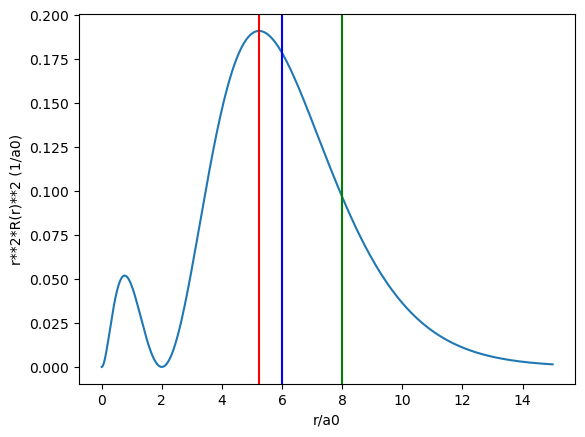

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Setting a0 to 1 to imply lengths are in units of a0
rho = np.linspace(0,15,1000)

def R(rho):
    return ((1/np.sqrt(2)*(1-rho/2)*np.exp(-rho/2)))

Prob_20 = rho**2*(R(rho))**2

plt.plot(rho,Prob_20)
plt.xlabel('r/a0')
plt.ylabel('r**2*R(r)**2 (1/a0)')
plt.axvline(6,0,4e9, color ='b')# <r>, solved below

plt.axvline(np.sqrt(5)+3,0,4e9,color='r')# most probable r, solved below

plt.axvline(8,0,4e9,color='g')# Classical limit of r, solved below

### 9. Determine and indicate on your plot $\langle r\rangle$, the expectation value of the distance of the electron from the nucleus. (Hint: the course outline gives an expression for this expectation value.)

From course outline notes, $<r> = (\frac{3}{2}n^2-l(l+1))a_0$, since $l=0$ and $n=2$, this simplifies to $ <r> = (\frac{3}{2}*4-0)a_0 =6a_0$, shown as a blue line on the graph.

### 10. Determine and indicate on your plot  $r_{MP}$, the most probable distance of the electron from the nucleus.

Using Wolfram-Alpha, derivative of the probability function is $-\frac{1}{8}e^{-r}*r(-8+16r-8r^2+r^3)$, Wolfram provides the roots for this function but we can confirm which one we want, which should be around 5.

In [ ]:
from scipy.optimize import fsolve

deriv = lambda r: -1/8*np.exp(-r)*r*(-8+16*r-8*r**2+r**3)# Defining derivative

root = fsolve(deriv, [5]) #will find route closest to the initial guess of 5
print(root)

[5.23606798]


In [ ]:
rt = np.sqrt(5)+3 # proving that this value is indeed the route
print(rt)

5.23606797749979


Point is shown on the graph by a red line.

### 11. Determine and indicate on your plot the maximum classical distance of the electron from the nucleus in this orbital.

In [ ]:
c = 14.39964# eV*A, potential energy constants bundled together
E_H = 27.212# eV
A_0 = 0.529177# A
r_cl = (8*c)/E_H
print(r_cl,'Angstrom')

R_cl = r_cl/A_0
print(R_cl,'*a_0')

4.233320593855652 Angstrom
7.99981970844472 *a_0


Plotted as a green line on the graph

### 12. (Extra Credit) What is the probability of finding the electron beyond the classical distance? (Evaluate the necessary integral numerically.)

In [ ]:
from scipy.integrate import quad

a= 8
b = np.inf
def Prob(R):
    return (1/np.sqrt(2)*(1-(R/(2)))*np.exp(-R/(2)))**2*R**2
prob,err = quad(Prob,a,b)
print(prob)

0.1855108332300911


Probability of being beyond the classical limit is about 18.55%

### 13. Can a 2s electron undergo an allowed transition to a lower energy electronic state? If so, what frequency (in cm$^{-1}$) of light would be emitted?

The only lower energy state would be the 1s orbital, however since quantum number $l$ would remain at 0 this transition would violate the selection rule of $\Delta l=\pm 1$ and is therefore forbidden.

16.

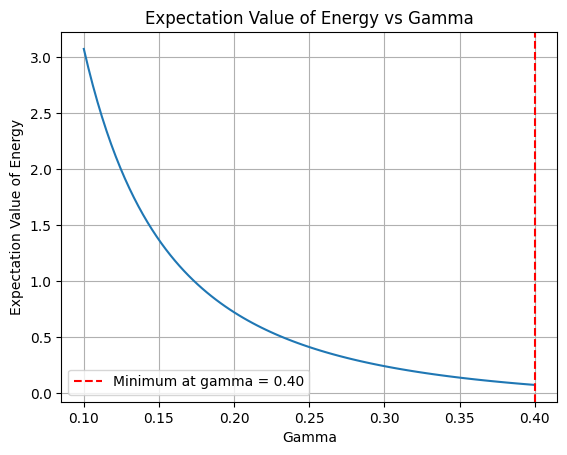

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential energy function for the hydrogen atom
def potential_energy(r):
    return -1 / r

# Define the trial wavefunction squared
def trial_wavefunction_squared(r, gamma):
    return np.exp(-2 * gamma * r**2)

# Function to compute the expectation value of energy using numerical integration
def expectation_energy(gamma, num_points=1000):
    # Define the range of integration (let's use a large range for better accuracy)
    r_values = np.linspace(0.001, 100, num_points)
    dr = r_values[1] - r_values[0]  # Step size

    # Compute the integrand for the kinetic energy
    kinetic_energy_integrand = 0.5 * trial_wavefunction_squared(r_values, gamma) * \
                                (-2 * gamma * r_values**2 + 4 * gamma**2 * r_values**4)

    # Compute the integrand for the potential energy
    potential_energy_integrand = trial_wavefunction_squared(r_values, gamma) * potential_energy(r_values)

    # Perform numerical integration using the trapezoidal rule
    kinetic_energy_integral = np.trapz(kinetic_energy_integrand * r_values**2, dx=dr)
    potential_energy_integral = np.trapz(potential_energy_integrand * r_values**2, dx=dr)

    # Total energy is the sum of kinetic and potential energy
    total_energy = kinetic_energy_integral + potential_energy_integral

    return total_energy

# Define the range of gamma values focusing around 0.25
gamma_values = np.linspace(0.1, 0.4, 100)

# Calculate expectation values of energy for each gamma
energy_values = [expectation_energy(gamma) for gamma in gamma_values]

# Find the index of the minimum energy value
min_energy_index = np.argmin(energy_values)
min_energy_gamma = gamma_values[min_energy_index]
min_energy = energy_values[min_energy_index]

# Plot <E> vs gamma
plt.plot(gamma_values, energy_values)
plt.xlabel('Gamma')
plt.ylabel('Expectation Value of Energy')
plt.title('Expectation Value of Energy vs Gamma')
plt.axvline(x=min_energy_gamma, color='r', linestyle='--', label=f'Minimum at gamma = {min_energy_gamma:.2f}')
plt.legend()
plt.grid(True)
plt.show()


17.

In [2]:
# Find the index of the minimum energy value
min_energy_index = np.argmin(energy_values)
min_energy_gamma = gamma_values[min_energy_index]
min_energy = energy_values[min_energy_index]

# Print the minimum energy and corresponding gamma value
print("Minimum energy:", min_energy)
print("Corresponding gamma:", min_energy_gamma)


Minimum energy: 0.07251477957033736
Corresponding gamma: 0.4
